<a href="https://colab.research.google.com/github/askot19/Estudos/blob/main/Estat%C3%ADstica%20Pr%C3%A1tica/1.%20An%C3%A1lise%20Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos acerca de estatística aplicada à Ciência de Dados. Meu objetivo aqui é implementar o que já conheço de estatística por meio do livro ***Estatística prática para cientistas de dados: 50 conceitos essenciais***, e me aprofundar no meio, tornando-me mais capaz, eficiente e eficaz nos meu projetos tanto profissionais quanto pessoais.

</p>

In [65]:
# Importação das bibliotecas para manipulação e tratamento de dados
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean

## Métricas Robustas para Localização

In [66]:
# Criação de dataset através de dicionário
homicidio = {'Estado': {0: 'Alabama',
                        1: 'Alasca',
                        2: 'Arizona',
                        3: 'Arkansas',
                        4: 'Califórnia',
                        5: 'Colorado',
                        6: 'Connecticut',
                        7: 'Delaware'

},
    'População': {
        0: 4779736,
        1: 710231,
        2: 6392017,
        3: 2915918,
        4: 37252956,
        5: 5029196,
        6: 3574097,
        7: 897934

    },
             'Taxa de Homicídio': {0: 5.7,
                                  1: 5.6,
                                  2: 4.7,
                                  3: 5.6,
                                  4: 4.4,
                                  5: 2.8,
                                   6: 2.4,
                                   7: 5.8
                                  }
}

In [67]:
# Importação dos dados para um Data Frame
dados = pd.DataFrame(homicidio)
dados

,Estado,População,Taxa de Homicídio
0,Alabama,4779736,5.7
1,Alasca,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,Califórnia,37252956,4.4
5,Colorado,5029196,2.8
6,Connecticut,3574097,2.4
7,Delaware,897934,5.8


In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado             8 non-null      object 
 1   População          8 non-null      int64  
 2   Taxa de Homicídio  8 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 256.0+ bytes


In [69]:
# média
dados['População'].mean()

7694010.625

In [70]:
# média aparada
trim_mean(dados.População, 0.25)

4074736.75

In [71]:
# mediana
dados['População'].median()

4176916.5

## Estimativas de Variabilidade

**Variância**

$S^2=\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}$



**Desvio Padrão**

$σ=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$


**Desvio Absoluto Médio**

$D_m = \frac{\sum_{i=1}^{n}|(x_i-\overline{x})|}{n} $

**Desvio absoluto mediano da mediana**

A mediana do valor absoluto dos desvios da mediana. (Utilizado quando temos Outliers no problema)

**Amplitude**

A diferença entre o maior e o menor valor no conjunto de dados


---

## Estatísticas ordinais

Métricas baseadas nos valores de dados classificados do menor ao maior.

**Percentil**

Valor tal que P por cento dos valores assumam esse valor ou menos, e (100-P) por cento assumam esse valor ou mais.

**Amplitude interquartílica (IQR)**

A diferença entre o 75º percentil e o 25º percentil.

In [72]:
# Desvio padrão
dados['População'].std()

12105396.467286125

In [73]:
# IQR
dados['População'].quantile()

4176916.5

In [74]:
# Desvio absoluto mediano da mediana (MAD)
stats.median_abs_deviation(dados['População'])

1738049.5

---

## Explorando a Distribuição de Dados

Cada uma das estimativas vistas anteriormente acaba resumindo os dados em um único número para descrever a localização ou variabilidade dos dados. É útil também explorar como os dados são distribuídos em geral.

**Boxplot**

Um gráfico apresentado por Tukey como um modo rápido de visualizar a distribuição dos dados.

**Tabela de frequências**

Um registro da contagem de valores numéricos de dados que caem em um conjunto de intervalos (colunas).

**Histograma**

Um gráfico da tabela de frequências com as colunas no eixo x e a contagem (ou proporção) no eixo y.

**Gráfico de densidade**

Uma versão simplificada do histograma, frequentemente usado em estimativas de densidade Kernel.

### Percentis e Boxplots

Os percentis são úteis para resumir a distribuição dos dados. É comum registrar os quartis (25º, 50º e 75º) e os decis (10º, 20º, ..., 90º). Os percentis são comumente utlizados para resumir *caudas* (a amplitude externa) da distribuição. Valores que ultrapassem 1,5 vezes o IQR são considerados Outliers e representados além dos *Whiskers*.

### Tabela de Frequências e Histogramas

Uma tabela de frequências de uma variável divide a amplitude variável em segmentos igualmente espaçados e nos diz quantos valores caem em cada segmento.

<Axes: xlabel='Estado', ylabel='População'>

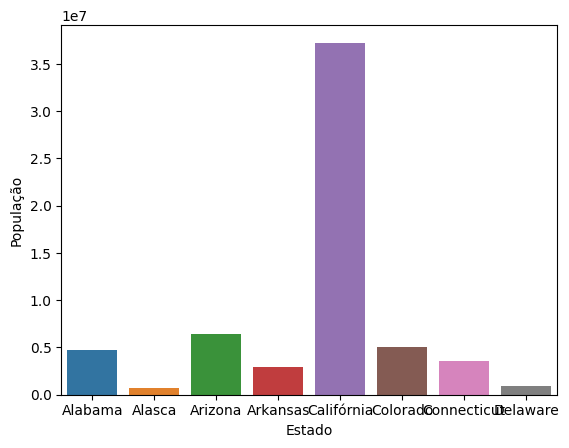

In [76]:
sns.barplot(data = dados, x = 'Estado',  y = 'População')